# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 15

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,50,13.050847,77,62.376999,5.9,4.779536,7.025604,4.661155,2.137474
96,Pope,Burnley,54,13.018868,69,61.302903,5.3,4.708774,5.311654,4.576778,2.026334
383,Lloris,Tottenham,56,15.000000,66,65.707736,4.4,4.380516,4.347288,4.149841,1.851106
325,Darlow,Newcastle Utd,50,14.054054,52,57.666117,3.7,4.103166,3.189316,3.962470,1.834992
431,Fabianski,West Ham,51,15.000000,63,61.894786,4.2,4.126319,2.856028,4.519617,1.827165
8,Leno,Arsenal,49,15.000000,54,58.461284,3.6,3.897419,4.324883,4.260866,1.760674
597,Sánchez,Brighton,44,4.062500,13,14.820733,3.2,3.648180,4.360897,3.610983,1.739202
516,Areola,Fulham,45,13.888889,50,50.988316,3.6,3.671159,4.806447,3.576476,1.730601
363,McCarthy,Southampton,47,15.121951,62,56.463118,4.1,3.733851,4.029747,3.501894,1.722297


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,2.988506,26,17.979149,8.7,6.016100,7.299213,5.765418,2.868063
273,Stones,Manchester City,49,6.000000,36,28.598068,6.0,4.766345,5.783998,4.844684,2.153215
277,Cancelo,Manchester City,56,10.000000,53,50.366194,5.3,5.036619,5.283454,5.111121,2.128360
470,Kilman,Wolves,42,8.095238,34,33.188295,4.2,4.099731,1.892521,3.999786,2.000464
461,Saïss,Wolves,50,10.000000,53,43.923323,5.3,4.392332,4.719351,4.289715,1.964311
123,James,Chelsea,52,13.095238,55,55.976964,4.2,4.274604,3.679793,4.117958,1.874538
232,Chilwell,Chelsea,61,11.964286,67,54.336721,5.6,4.541577,3.000525,4.378427,1.838831
165,Holgate,Everton,48,5.961538,31,23.919114,5.2,4.012238,5.218542,3.809448,1.831328
246,Matip,Liverpool,55,8.000000,40,33.555447,5.0,4.194431,5.568317,4.312568,1.788511


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
37,Grealish,Aston Villa,78,12.941176,88,76.263063,6.8,5.893055,5.370306,5.694403,2.110052
302,Fernandes,Manchester Utd,111,14.074074,114,98.606464,8.1,7.006249,7.444981,7.013375,2.102926
45,El Ghazi,Aston Villa,57,7.037037,38,35.282426,5.4,5.013818,8.143603,4.816227,2.100057
105,Jorginho,Chelsea,48,9.069767,39,39.966025,4.3,4.406510,2.803265,4.150406,2.011288
272,De Bruyne,Manchester City,117,13.076923,68,88.639082,5.2,6.778283,8.346019,6.744084,1.981649
40,Trézéguet,Aston Villa,52,8.928571,25,40.141478,2.8,4.495846,NaN,4.331926,1.971559
141,Zaha,Crystal Palace,75,12.950820,79,69.096265,6.1,5.335281,4.435207,5.339541,1.948169
254,Salah,Liverpool,126,13.953488,120,96.309324,8.6,6.902168,6.511569,6.889732,1.944466
390,Son,Tottenham,97,15.063291,119,88.425382,7.9,5.870256,5.417111,6.101292,1.884826


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,66,12.058824,82,72.057660,6.8,5.975513,4.835474,6.290351,2.325965
202,Bamford,Leeds United,65,14.918033,91,88.428245,6.1,5.927608,5.675695,5.851196,2.324999
514,Watkins,Aston Villa,61,13.000000,65,70.017660,5.0,5.385974,5.002061,5.197711,2.180717
224,Vardy,Leicester City,101,13.947368,106,93.725904,7.6,6.719970,6.725836,6.517170,2.114495
388,Kane,Tottenham,110,15.066667,113,98.134149,7.5,6.513328,4.744594,6.859029,1.963842
377,Adams,Southampton,61,15.000000,69,67.747074,4.6,4.516472,3.821284,4.656729,1.828666
164,Calvert-Lewin,Everton,80,15.000000,93,75.877660,6.2,5.058511,3.877542,4.810309,1.788454
68,Maupay,Brighton,61,13.076923,51,56.929415,3.9,4.353426,3.150000,4.395398,1.762651
588,Welbeck,Brighton,55,9.000000,36,35.738830,4.0,3.970981,3.784594,3.996719,1.693232


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,111,14.074074,114,98.606464,8.1,7.006249,7.013375,2.102926
254,Salah,Liverpool,126,13.953488,120,96.309324,8.6,6.902168,6.889732,1.944466
272,De Bruyne,Manchester City,117,13.076923,68,88.639082,5.2,6.778283,6.744084,1.981649
224,Vardy,Leicester City,101,13.947368,106,93.725904,7.6,6.719970,6.517170,2.114495
388,Kane,Tottenham,110,15.066667,113,98.134149,7.5,6.513328,6.859029,1.963842
39,Hause,Aston Villa,44,2.988506,26,17.979149,8.7,6.016100,5.765418,2.868063
506,Wilson,Newcastle Utd,66,12.058824,82,72.057660,6.8,5.975513,6.290351,2.325965
202,Bamford,Leeds United,65,14.918033,91,88.428245,6.1,5.927608,5.851196,2.324999
37,Grealish,Aston Villa,78,12.941176,88,76.263063,6.8,5.893055,5.694403,2.110052


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
45,El Ghazi,Aston Villa,57,7.037037,5.4,5.013818,8.143603,4.189442,4.816227,2.100057
105,Jorginho,Chelsea,48,9.069767,4.3,4.406510,2.803265,4.062457,4.150406,2.011288
40,Trézéguet,Aston Villa,52,8.928571,2.8,4.495846,NaN,3.812254,4.331926,1.971559
203,Harrison,Leeds United,54,13.902439,4.1,4.294141,3.942199,5.065011,4.310199,1.847904
449,Soucek,West Ham,51,15.000000,4.2,4.059541,5.274007,3.896556,4.279121,1.797595
33,Hourihane,Aston Villa,59,4.000000,5.0,4.300225,NaN,3.840745,4.189906,1.770375
557,Lookman,Fulham,50,11.944444,3.6,3.955924,3.587307,3.590014,3.779219,1.769143
474,Neto,Wolves,59,15.000000,4.8,4.187427,4.367992,4.036216,4.150894,1.723936
106,Barkley,Aston Villa,59,8.000000,4.0,4.154048,NaN,3.598134,4.020665,1.710194


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
272,De Bruyne,Manchester City,117,13.076923,68,88.639082,5.2,6.778283,8.346019,6.744084,1.981649
45,El Ghazi,Aston Villa,57,7.037037,38,35.282426,5.4,5.013818,8.143603,4.816227,2.100057
302,Fernandes,Manchester Utd,111,14.074074,114,98.606464,8.1,7.006249,7.444981,7.013375,2.102926
39,Hause,Aston Villa,44,2.988506,26,17.979149,8.7,6.016100,7.299213,5.765418,2.868063
12,Martínez,Aston Villa,50,13.050847,77,62.376999,5.9,4.779536,7.025604,4.661155,2.137474
224,Vardy,Leicester City,101,13.947368,106,93.725904,7.6,6.719970,6.725836,6.517170,2.114495
254,Salah,Liverpool,126,13.953488,120,96.309324,8.6,6.902168,6.511569,6.889732,1.944466
276,Sterling,Manchester City,114,12.909091,71,66.301620,5.5,5.136041,6.420625,5.127575,1.521164
150,Sigurdsson,Everton,68,14.117647,48,49.236749,3.4,3.487603,6.244270,3.347744,1.337435


In [11]:
metric = 'next1_xP'

display(df[goalkeepers].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next1_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
96,Pope,Burnley,54,13.018868,69,61.302903,5.3,4.708774,5.228445,2.026334
383,Lloris,Tottenham,56,15.000000,66,65.707736,4.4,4.380516,4.752855,1.851106
213,Meslier,Leeds United,46,15.121951,62,51.529841,4.1,3.407618,4.423797,1.588810
560,Kelleher,Liverpool,45,1.000000,7,4.127077,7.0,4.127077,4.392287,1.945523
431,Fabianski,West Ham,51,15.000000,63,61.894786,4.2,4.126319,4.379459,1.827165
12,Martínez,Aston Villa,50,13.050847,77,62.376999,5.9,4.779536,4.291689,2.137474
252,Alisson,Liverpool,59,12.105263,46,47.643566,3.8,3.935773,4.200983,1.620332
217,Schmeichel,Leicester City,55,15.128205,59,55.713029,3.9,3.682726,3.969166,1.570319
597,Sánchez,Brighton,44,4.062500,13,14.820733,3.2,3.648180,3.917940,1.739202


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,101,13.947368,7.6,6.719970,6.766957,2.114495,11.2,1.5,12.7,0.910566
202,Bamford,Leeds United,65,14.918033,6.1,5.927608,6.814620,2.324999,10.4,0.8,11.2,0.750769
254,Salah,Liverpool,126,13.953488,8.6,6.902168,6.939144,1.944466,8.5,2.8,11.3,0.809833
514,Watkins,Aston Villa,61,13.000000,5.0,5.385974,4.598820,2.180717,8.4,1.5,9.9,0.761538
164,Calvert-Lewin,Everton,80,15.000000,6.2,5.058511,4.399228,1.788454,8.3,0.6,8.9,0.593333
388,Kane,Tottenham,110,15.066667,7.5,6.513328,7.000805,1.963842,7.6,4.0,11.6,0.769912
251,Mané,Liverpool,119,13.928571,5.6,5.834893,5.875450,1.691451,7.3,2.0,9.3,0.667692
506,Wilson,Newcastle Utd,66,12.058824,6.8,5.975513,6.040662,2.325965,7.2,1.1,8.3,0.688293
302,Fernandes,Manchester Utd,111,14.074074,8.1,7.006249,6.916316,2.102926,6.9,5.4,12.3,0.873947


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
388,10,18,397,100.0,100.0,5,78830,NaN,NaN,0,0,5,-5,291.5,26,1,1.0,NaN,4,4,5.8,5.3,2,Harry,4.8,14,9,155.0,4,1,True,610.0,2,1,1343,NaN,2020-12-02T13:00:19.592396Z,110,0,0,1.0,0,NaN,78830.jpg,7.5,0,0,Kane,42.1,False,...,1.2,1.0,0.2,1.0,2.7,0.1,0.0,1.1,1.0,0.1,0.0,7.522968,0.3,1.0,0.9,1.0,0.1,1.0,6.6,0.4,1.0,1.2,0.0,0.0,0.0,3.2,0.3,0.0,1.0,0.0,0.0,0.0,4.0,0.5,0.0,1.6,0.0,0.0,0.0,4.744594,4.840939,7.000805,6.859029,6.593028,0.592121,0.431327,0.440085,1.963842,11.6,0.769912


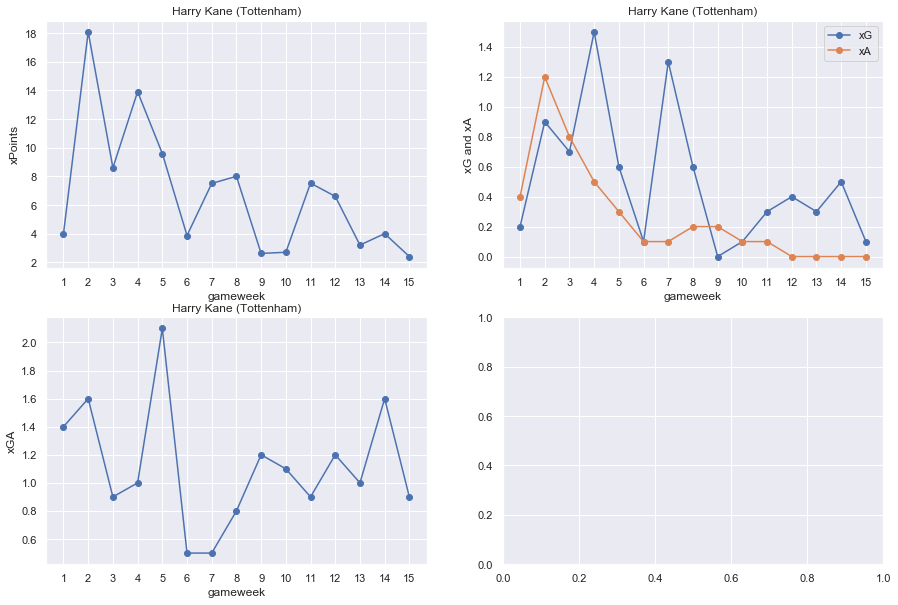

In [21]:
# find player index
name_string = 'Kane'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 12

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df[df['web_name'].str.contains('Coufal')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,xPoints week 12,xG_week12,goals_week12,xGA_week12,cleansheet_week12,xA_week12,assists_week12,xPoints week 13,xG_week13,goals_week13,xGA_week13,cleansheet_week13,xA_week13,assists_week13,xPoints week 14,xG_week14,goals_week14,xGA_week14,cleansheet_week14,xA_week14,assists_week14,form 5,form 10,next1_xP,next5_xP,next10_xP,value,value form 5,value form 10,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
558,3,8,228,NaN,NaN,3,164555,NaN,NaN,0,0,2,-2,294.0,23,6,NaN,NaN,0,2,2.5,2.5,1,Vladimir,2.5,17,0,62.1,59,8,False,250.2,77,28,1074,NaN,NaN,47,0,0,NaN,0,NaN,164555.jpg,3.8,0,0,Coufal,4.9,False,...,0.6,1.0,0.3,0.0,2.297094,0.0,0.0,2.6,0.0,0.0,0.0,3.041341,0.0,0.0,2.0,0.0,0.5,0.0,3.261196,0.0,0.0,1.8,0.0,0.2,0.0,7.637906,0.0,0.0,1.1,0.0,0.1,1.0,2.141341,0.0,0.0,2.0,0.0,0.2,0.0,3.777312,4.037083,4.005198,4.286057,3.966616,0.817801,0.803683,0.858954,1.772951,1.9,0.156957


In [16]:
my_starting11 = [12,232,558,277,254,302,37,141,506,202,388]
my_subs = [35,474,200,146]

In [17]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,50,13.050847,5.9,4.779536,7.025604,4.581985,4.291689,4.661155,2.137474
232,Chilwell,Chelsea,61,11.964286,5.6,4.541577,3.000525,4.527118,4.040439,4.378427,1.838831
558,Coufal,West Ham,47,12.105263,3.8,3.843667,3.777312,4.037083,4.005198,4.286057,1.772951
277,Cancelo,Manchester City,56,10.000000,5.3,5.036619,5.283454,5.512307,4.795893,5.111121,2.128360
254,Salah,Liverpool,126,13.953488,8.6,6.902168,6.511569,6.751752,6.939144,6.889732,1.944466
302,Fernandes,Manchester Utd,111,14.074074,8.1,7.006249,7.444981,7.377761,6.916316,7.013375,2.102926
37,Grealish,Aston Villa,78,12.941176,6.8,5.893055,5.370306,5.572173,5.064246,5.694403,2.110052
141,Zaha,Crystal Palace,75,12.950820,6.1,5.335281,4.435207,5.632977,5.413358,5.339541,1.948169
506,Wilson,Newcastle Utd,66,12.058824,6.8,5.975513,4.835474,5.780723,6.040662,6.290351,2.325965



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
474,Neto,Wolves,59,15.000000,4.8,4.187427,4.367992,4.835924,4.036216,4.150894,1.723936
200,Dallas,Leeds United,47,14.871795,3.9,2.665890,2.471704,2.804423,3.933644,2.886540,1.229683
146,Mitchell,Crystal Palace,39,6.000000,2.5,2.536316,NaN,3.931484,2.472751,2.543660,1.284314


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)